<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Shutterstock - Search for images

**Tags:** #shutterstock #images #search #api #reference #library

**Author:** [Florent Ravenel](https://www.linkedin.com/in/florent-ravenel/)

**Description:** This notebook will demonstrate how to use the Shutterstock API to search for images.

**References:**
- [Shutterstock API Reference](https://api-reference.shutterstock.com/#images)

## Input

### Import libraries

In [18]:
import json
import naas
import requests
from PIL import Image
import io
import matplotlib.pyplot as plt
import pydash

### Setup Variables
- `api_key`: [Get your API key](https://developers.shutterstock.com/getting-started)
- `query`: The search query

In [3]:
api_key = naas.secret.get("SHUTTERSTOCK_KEY")
query = "cat"

## Model

### Search for images

This function will search for images using the Shutterstock API.

In [14]:
def search_images(api_key, query):
    url = "https://api.shutterstock.com/v2/images/search"
    params = {
        "query": query,
        "view": "minimal",
        "sort": "popular",
        "page": 1,
        "per_page": 10,
    }
    headers = {"Authorization": "Bearer " + api_key}
    response = requests.get(url, params=params, headers=headers)
    return response.json()

result = search_images(api_key, query)
print("Total result", result.get("total_count"))

Total result 13202


## Output

### Display result

Image URL: https://image.shutterstock.com/image-vector/sweet-slogan-cute-cats-couple-450w-2013405230.jpg


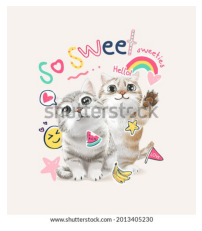

Image URL: https://image.shutterstock.com/image-vector/cute-cat-hanging-on-meow-450w-1195844716.jpg


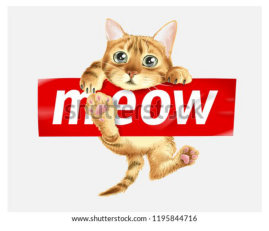

Image URL: https://image.shutterstock.com/image-vector/paper-ripped-off-cat-sunglasses-450w-1549014383.jpg


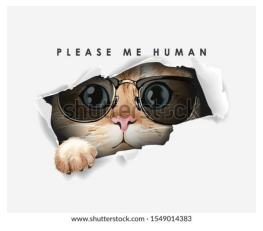

Image URL: https://image.shutterstock.com/image-vector/cute-cat-butterfly-curious-paper-450w-1806536833.jpg


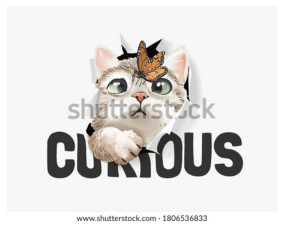

Image URL: https://image.shutterstock.com/image-vector/cartoon-cute-cat-through-ripped-450w-1407903557.jpg


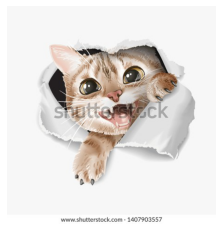

Image URL: https://image.shutterstock.com/image-vector/little-angel-slogan-cute-cat-450w-1808077294.jpg


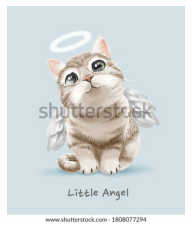

Image URL: https://image.shutterstock.com/image-vector/three-cartoon-little-kitten-illustration-450w-1929833780.jpg


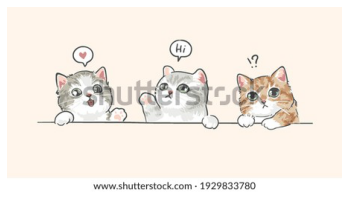

Image URL: https://image.shutterstock.com/image-photo/happy-relaxed-hispanic-teen-girl-450w-1731088138.jpg


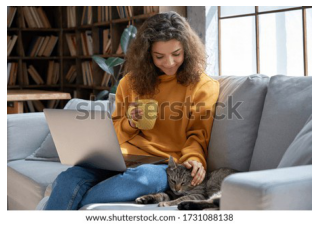

Image URL: https://image.shutterstock.com/image-vector/angels-slogan-cute-cat-vector-450w-1979174234.jpg


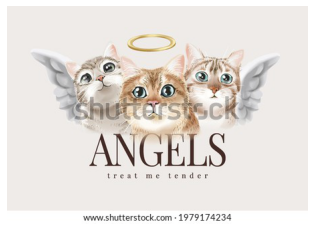

Image URL: https://image.shutterstock.com/image-photo/young-hispanic-latin-teen-girl-450w-1730686843.jpg


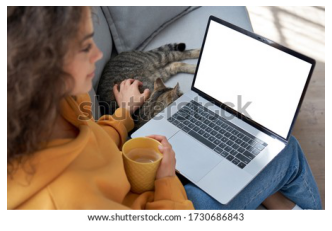

In [22]:
def display_image_from_url(image_url):
    # Download the image from the URL
    response = requests.get(image_url)
    image_bytes = response.content

    # Open the image from bytes
    image = Image.open(io.BytesIO(image_bytes))

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
for d in result.get("data"):
    image_url = pydash.get(d, "assets.preview.url")
    print("Image URL:", image_url)
    display_image_from_url(image_url)